# Pakistan's E-Commerce

## Latar Belakang

Ketertarikan masyarakat terhadap E-commerce di Pakistan sedang naik daun. Untuk memanfaatkan hal tersebut, perusahaan-perusahaan e-commerce di Pakistan perlu melakukan tindakan yang tepat dalam memberikan fitur, kemudahan, maupun pelayanan kepada pelanggan sehingga angka penjualan terus naik dan bisa menguasai pasar di Pakistan.

## Pernyataan Masalah

Perusahaan ingin mengetahui catatan hasil penjualan secara detail. Dengan infromasi tersebut, perusahaan akan mampu untuk menyusun strategi pemasaran dan meningkatkan pelayanan kepada pelanggan sehingga mampu untuk meningkatkan omzet penjualan e-commerce di Pakistan.

Dengan keadaan tersebut, permasalahan yang harus diselesaikan adalah:
1. Bagaimana kecenderungan rekam jejak hasil penjualan e-commerce di Pakistan?
2. Apakah strategi pemasaran yang diterapkan sudah tepat?
3. Apakah fitur dan pelayanan yang diberikan sudah maksimal?

## Data Preparation

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency

In [155]:
df999=pd.read_csv('Pakistan Largest Ecommerce Dataset.csv')
pd.set_option("display.max_columns", None)

In [156]:
df = df999.copy()

### Data Understanding

In [157]:
df.head(3)

# Mengetahui 3 data pertama, dan setiap kolom sebagai analisa awal untuk mencari hubungan antar kolom

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN


In [158]:
df.shape

# Pada dataset ini, terdapat 1048575 baris dan 26 kolom

(1048575, 26)

In [159]:
df.describe()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,584524.000000,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.000000,584524.000000,584513.000000,0.0,0.0,0.0,0.0,0.0
mean,565667.074218,6.348748e+03,1.296388,8.530619e+03,499.492775,2017.044115,7.167654,45790.511965,NaN,NaN,NaN,NaN,NaN
std,200121.173648,1.494927e+04,3.996061,6.132081e+04,1506.943046,0.707355,3.486305,34414.962389,NaN,NaN,NaN,NaN,NaN
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,395000.750000,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000,13516.000000,NaN,NaN,NaN,NaN,NaN
50%,568424.500000,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000,42856.000000,NaN,NaN,NaN,NaN,NaN
75%,739106.250000,4.070000e+03,1.000000,6.999000e+03,160.500000,2018.000000,11.000000,73536.000000,NaN,NaN,NaN,NaN,NaN
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000,NaN,NaN,NaN,NaN,NaN


- Ditemukan beberapa kolom dengan nilai NaN atau Missing Value, yang mana harus ditangani.<br>
- Selain itu, juga ditemukan nilai kolom price 0, nilai pada kolom grand_total dengan jumlah minus, dan nilai kolom discount_amount dengan jumlah minus yang mana sangat janggal dalam suatu proses bisnis jual beli. Masalah ini akan diselesaikan setelah melihat dan menangani masalah Missing Value.

### Data Cleaning Missing Value

In [160]:
df.isna().sum()

# Melihat jumlah missing value pada dataset

item_id                   464051
status                    464066
created_at                464051
sku                       464071
price                     464051
qty_ordered               464051
grand_total               464051
increment_id              464051
category_name_1           464215
sales_commission_code     601226
discount_amount           464051
payment_method            464051
Working Date              464051
BI Status                 464051
 MV                       464051
Year                      464051
Month                     464051
Customer Since            464062
M-Y                       464051
FY                        464051
Customer ID               464062
Unnamed: 21              1048575
Unnamed: 22              1048575
Unnamed: 23              1048575
Unnamed: 24              1048575
Unnamed: 25              1048575
dtype: int64

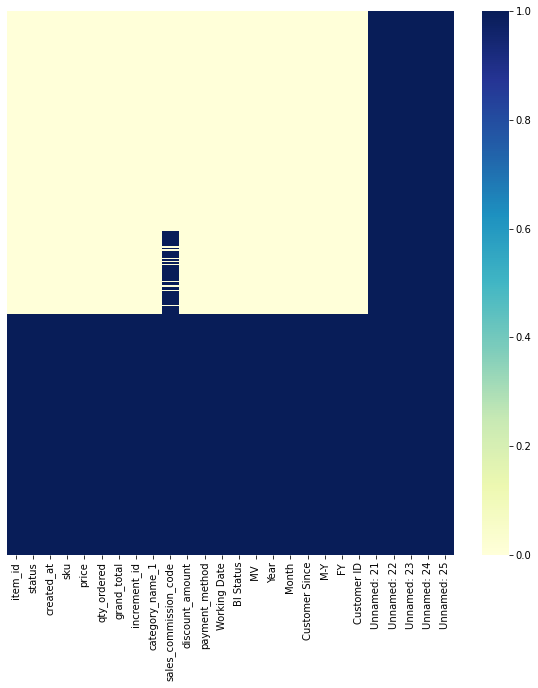

In [161]:
plt.figure(figsize=(10,10))
HMisnull = sns.heatmap(df.isnull(),yticklabels=False, cmap ='YlGnBu')

# Distribusi missing value pada keseluruhan data

- Dari hasil cek missing value dan distribusinya, maka perlu dilakukan tindakan untuk menangani missing value agar data bisa di analisa dengan baik. Selain itu, perlu mengganti nama kolom ' MV ' menjadi 'MV' agar tidak menimbulkan masalah di proses selanjutnya. 
- Namun setelah melakukan analisa lebih lanjut dengan tabel df.head(3) diatas, kolom MV merupakan hasil kali antara kolom price dengan kolom qty_ordered. Maka dari itu, nama kolom ' MV ' akan diubah menjadi 'total_price'. Sebagai informasi tambahan, nilai kolom grand_total merupakan hasil dari nilai kolom total_price dikurangi kolom discount_amount.

In [162]:
df.dropna(how = 'all', inplace=True)
df.dropna(how = 'all', axis=1, inplace=True)
df.rename(columns={' MV ':'total_price'}, inplace=True)
df.isna().sum()

# Menghapus baris dan kolom yang keseluruhan valuenya merupakan 'NaN'

item_id                       0
status                       15
created_at                    0
sku                          20
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
category_name_1             164
sales_commission_code    137175
discount_amount               0
payment_method                0
Working Date                  0
BI Status                     0
total_price                   0
Year                          0
Month                         0
Customer Since               11
M-Y                           0
FY                            0
Customer ID                  11
dtype: int64

Setelah dilakukan penghapusan kolom dan baris yang memiliki 'NaN' pada semua valuenya, akan dilakukan pemeriksaan mengenai data duplikat dan menangani Permasalahan tersebut.

In [163]:
print(df.shape)
print(df.duplicated().value_counts())



(584524, 21)
False    584524
dtype: int64


Didapatkan hasil yaitu seluruh data tidak ada yang duplikat, dengan membandingkan jumlah False dengan total keseluruhan data(row).

Kini tersisa 6 kolom yang masih memiliki Missing Value. Kolom sales_commision_code atau bisa dianggap sebagai kode promo atau kode referal merupakan kolom dengan Missing Value terbanyak dengan 137175 value. Kolom ini bisa dihapus karena tidak digunakan untuk analisa yang akan dilakukan.

In [164]:
df.drop('sales_commission_code', axis=1, inplace=True)

In [165]:
df.isna().sum()

item_id              0
status              15
created_at           0
sku                 20
price                0
qty_ordered          0
grand_total          0
increment_id         0
category_name_1    164
discount_amount      0
payment_method       0
Working Date         0
BI Status            0
total_price          0
Year                 0
Month                0
Customer Since      11
M-Y                  0
FY                   0
Customer ID         11
dtype: int64

Berlanjut ke kolom status. Pada kolom ini, terdapat 15 Missing Value. Mari kita analisa value dari kolom tersebut.

In [166]:
df['status'].value_counts()

complete          233685
canceled          201249
received           77290
order_refunded     59529
refund              8050
cod                 2859
paid                1159
closed               494
payment_review        57
pending               48
processing            33
holded                31
fraud                 10
pending_paypal         7
exchange               4
\N                     4
Name: status, dtype: int64

In [167]:
df[df['status'].isna()]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,total_price,Year,Month,Customer Since,M-Y,FY,Customer ID
477519,783751.0,NaN,3/15/2018,OTHPCB5A7D8A0BD10E8,8000.0,1.0,8000.0,100479380,Others,0.0,cod,3/15/2018,Gross,"8,000",2018.0,3.0,2018-3,3-2018,FY18,95141.0
513736,827187.0,NaN,4/16/2018,KABOXF5ABCC75C7E2F7-32,370.0,1.0,2707.0,100513933,Kids & Baby,0.0,cod,4/16/2018,Gross,370,2018.0,4.0,2018-4,4-2018,FY18,105059.0
513737,827189.0,NaN,4/16/2018,KABSHO5AA77C331466F-11-13 Years,473.0,1.0,2707.0,100513933,Kids & Baby,0.0,cod,4/16/2018,Gross,473,2018.0,4.0,2018-4,4-2018,FY18,105059.0
513738,827191.0,NaN,4/16/2018,KABBIN5A93E074C501A-8-9 Years,749.0,1.0,2707.0,100513933,Kids & Baby,0.0,cod,4/16/2018,Gross,749,2018.0,4.0,2018-4,4-2018,FY18,105059.0
513739,827193.0,NaN,4/16/2018,KABLIT59AC117FD51C4-12-13 Years,692.0,1.0,2707.0,100513933,Kids & Baby,0.0,cod,4/16/2018,Gross,692,2018.0,4.0,2018-4,4-2018,FY18,105059.0
513740,827195.0,NaN,4/16/2018,KABCOL5AB2B8019805C-8-9 Years,423.0,1.0,2707.0,100513933,Kids & Baby,0.0,cod,4/16/2018,Gross,423,2018.0,4.0,2018-4,4-2018,FY18,105059.0
518706,832777.0,NaN,4/30/2018,ENTCLI5A5DD7D800D6E,6042.0,1.0,6042.0,100517141,Entertainment,0.0,cod,4/30/2018,Gross,"6,042",2018.0,4.0,2018-4,4-2018,FY18,106036.0
532965,848003.0,NaN,5/14/2018,MATINF5AE310D2D7A1A,13950.0,1.0,13950.0,100527966,Mobiles & Tablets,0.0,cod,5/14/2018,Gross,"13,950",2018.0,5.0,2018-4,5-2018,FY18,105319.0
542146,857829.0,NaN,5/25/2018,ROO5AE983F2751EA,2280.0,1.0,2280.0,100534786,Superstore,0.0,cod,5/25/2018,Gross,"2,280",2018.0,5.0,2018-5,5-2018,FY18,109580.0
554962,872154.0,NaN,6/15/2018,BAGPHI5AA665985A58E,2900.0,1.0,949.0,100542483,Beauty & Grooming,200.0,bankalfalah,6/15/2018,Gross,"2,900",2018.0,6.0,2018-5,6-2018,FY18,109420.0


1. Missing Value pada kolom status memiliki kesamaan yaitu sama-sama berlabel Gross pada kolom BI Status. Dengan adanya hal tersebut, maka perlu melihat hubungan antara kolom status dan BI Status.
2. Ditemukan kembali nilai 0 pada kolom price.
3. Selain itu, juga ditemukan ketidak cocokan pada kolom grand_total, yang mana merupakan kolom total_price dikurangi kolom discount_amount. total_price sendiri didapatkan dari kolom price dikali dengan kolom qty_ordered (jumlah produk yang diorder). Perhitungan tersebut didapatkan melalui analisa pada kolom lainnya yang dinilai memiliki keadaan normal. Kita akan menyelesaikan permasalahan 2 dan 3 setelah menyelesaikan permasalahan Missing Value.

In [168]:
df.groupby('BI Status')['status'].value_counts()

BI Status  status        
#REF!      complete               1
Gross      canceled          201249
           payment_review        57
           pending               48
           processing            33
           holded                31
           fraud                 10
           pending_paypal         7
           \N                     4
Net        complete          233684
           closed               494
Valid      received           77290
           order_refunded     59529
           refund              8050
           cod                 2859
           paid                1159
           exchange               4
Name: status, dtype: int64

Pada hasil syntax diatas, jenis value pada kolom BI Status menggambarkan kondisi status pembelian. Seperti Gross adalah produk yang tidak/belum sampai ke pelanggan, Net adalah produk yang telah sampai ke pelanggan, dan Valid terbagi menjadi 2 yaitu barang yang diterima (received, cod, paid) dan barang yang di kembalikan/refund (order_refunded, refund, exchange). Hanya #REF! yang dinilai memiliki kecacatan (hanya ada 1 data) dalam data input.
Dengan beragamnya label dari kolom status dan beberapa menjelaskan kondisi yang sama, maka label baru akan dibuat untuk memberikan keterangan yang lebih efektif.

Yang akan dilakukan:
1. #REF! akan dimasukkan ke kategori Net, karena label status pada data sesuai dengan pengelompokan pada label BI Status (complete)
2. complete, closed, received, cod, paid, exchange akan diubah menjadi Completed
3. payment_review, processing akan diubah menjadi Processing
4. pending, pending_paypal, holded akan diubah menjadi Pending
5. order_refunded, refund akan diubah menjadi Refund
6. canceled, \N akan diubah menjadi Canceled
7. fraud akan diubah menjadi Fraud
8. Untuk 15 data pada kolom status dengan Missing Value, akan diisi dengan Canceled sesuai pengelompokan BI Status sebelumnya

Note: Tidak ada keterangan khusus terkait kolom BI Status. Hal yang tertulis disini merupakan hasil analisa dan asumsi dengan tujuan mengatasi masalah Missing Value dan merapikan data.

In [169]:
df['BI Status'] = df['BI Status'].replace('#REF!', 'Net')
df['status'] = df['status'].replace('complete', 'Completed')
df['status'] = df['status'].replace('closed', 'Completed')
df['status'] = df['status'].replace('received', 'Completed')
df['status'] = df['status'].replace('cod', 'Completed')
df['status'] = df['status'].replace('paid', 'Completed')
df['status'] = df['status'].replace('exchange', 'Completed')
df['status'] = df['status'].replace('payment_review', 'Processing')
df['status'] = df['status'].replace('processing', 'Processing')
df['status'] = df['status'].replace('pending', 'Pending')
df['status'] = df['status'].replace('pending_paypal', 'Pending')
df['status'] = df['status'].replace('holded', 'Pending')
df['status'] = df['status'].replace('order_refunded', 'Refund')
df['status'] = df['status'].replace('refund', 'Refund')
df['status'] = df['status'].replace('canceled', 'Canceled')
df['status'] = df['status'].replace(r'\N', 'Canceled')
df['status'] = df['status'].replace('fraud', 'Fraud')
df['status'].fillna('Canceled', inplace=True)

In [170]:
df['status'].value_counts()

Completed     315491
Canceled      201268
Refund         67579
Processing        90
Pending           86
Fraud             10
Name: status, dtype: int64

In [171]:
df.isna().sum()

item_id              0
status               0
created_at           0
sku                 20
price                0
qty_ordered          0
grand_total          0
increment_id         0
category_name_1    164
discount_amount      0
payment_method       0
Working Date         0
BI Status            0
total_price          0
Year                 0
Month                0
Customer Since      11
M-Y                  0
FY                   0
Customer ID         11
dtype: int64

Berlanjut ke kolom ke 3, yaitu kolom sku. Kolom ini memiliki 20 data yang memiliki Missing Value untuk ditangani.

In [172]:
df[df['sku'].isna()]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,total_price,Year,Month,Customer Since,M-Y,FY,Customer ID
14846,230008.0,Canceled,8/13/2016,NaN,0.0,1.0,0.0,100160070,\N,0.0,cod,8/13/2016,Gross,-,2016.0,8.0,2016-8,8-2016,FY17,3468.0
20676,236830.0,Canceled,9/1/2016,NaN,0.0,1.0,0.0,100164902,\N,0.0,cod,9/1/2016,Gross,-,2016.0,9.0,2016-8,9-2016,FY17,4369.0
39838,260006.0,Canceled,10/7/2016,NaN,0.0,1.0,0.0,100181136,\N,0.0,cod,10/7/2016,Gross,-,2016.0,10.0,2016-7,10-2016,FY17,939.0
39839,260007.0,Canceled,10/7/2016,NaN,0.0,3.0,0.0,100181137,\N,0.0,cod,10/7/2016,Gross,-,2016.0,10.0,2016-7,10-2016,FY17,939.0
39880,260061.0,Canceled,10/7/2016,NaN,0.0,3.0,0.0,100181174,\N,0.0,cod,10/7/2016,Gross,-,2016.0,10.0,2016-7,10-2016,FY17,939.0
124968,367292.0,Refund,12/10/2016,NaN,0.0,1.0,0.0,100247863,\N,0.0,cod,12/10/2016,Valid,-,2016.0,12.0,2016-11,12-2016,FY17,26305.0
125636,368122.0,Refund,12/12/2016,NaN,0.0,1.0,0.0,100248364,\N,0.0,cod,12/12/2016,Valid,-,2016.0,12.0,2016-7,12-2016,FY17,2246.0
125811,368362.0,Refund,12/13/2016,NaN,0.0,1.0,0.0,100248497,\N,0.0,cod,12/13/2016,Valid,-,2016.0,12.0,2016-7,12-2016,FY17,251.0
149597,399798.0,Refund,2/7/2017,NaN,0.0,1.0,0.0,100267148,\N,0.0,cod,2/7/2017,Valid,-,2017.0,2.0,2017-2,2-2017,FY17,33062.0
170249,426105.0,Canceled,3/21/2017,NaN,0.0,1.0,6952.0,100281645,\N,0.0,cod,3/21/2017,Gross,-,2017.0,3.0,2017-3,3-2017,FY17,38242.0


Setelah melihat dan menganalisa semua Missing Value pada kolom sku, maka tidak didapatkan hubungan dengan kolom yang lain. Untuk menaikkan akurasi data pada saat proses analisa, maka Missing Value pada kolom ini dapat diatasi dengan mengisi Missing Value dengan 'Unrecorded'

In [173]:
df['sku'].fillna('Unrecorded', inplace=True)

In [174]:
df.isna().sum()

item_id              0
status               0
created_at           0
sku                  0
price                0
qty_ordered          0
grand_total          0
increment_id         0
category_name_1    164
discount_amount      0
payment_method       0
Working Date         0
BI Status            0
total_price          0
Year                 0
Month                0
Customer Since      11
M-Y                  0
FY                   0
Customer ID         11
dtype: int64

Berlanjut ke kolom ke 4 yaitu category_name_1, yang memiliki 164 data dengan Missing Value.

In [175]:
df['category_name_1'].value_counts()

Mobiles & Tablets     115710
Men's Fashion          92221
Women's Fashion        59721
Appliances             52413
Superstore             43613
Beauty & Grooming      41496
Soghaat                34011
Others                 29218
Home & Living          26504
Entertainment          26326
Health & Sports        17502
Kids & Baby            16494
Computing              15933
\N                      7850
School & Education      3478
Books                   1870
Name: category_name_1, dtype: int64

Selain 164 baris Missing Value, ditemukan sebanyak 7850 baris memiliki label '\N' pada kolom 'category_name_1'. Lalu, nama kolom 'category_name_1' dinilai kurang baik dalam merepresentasikan nama kolom dengan tidak adanya nama kolom yang mirip. Yang akan dilakukan adalah:
1. Mengubah nama kolom 'category_name_1' menjadi Category
2. Mengubah label '\N' di masukkan ke dalam Others
3. Mengisi nilai Missing Value dengan 'Others'

In [176]:
df.rename(columns={'category_name_1':'Category'}, inplace=True)
df['Category'] = df['Category'].replace(r'\N', 'Others')
df['Category'].fillna('Others', inplace=True)

In [177]:
df.isna().sum()

item_id             0
status              0
created_at          0
sku                 0
price               0
qty_ordered         0
grand_total         0
increment_id        0
Category            0
discount_amount     0
payment_method      0
Working Date        0
BI Status           0
total_price         0
Year                0
Month               0
Customer Since     11
M-Y                 0
FY                  0
Customer ID        11
dtype: int64

Tersisa 2 kolom yang masih memiliki missing value. Kolom yang akan ditangani selanjutnya adalah kolom 'Customer Since' dan 'Customer ID'.

In [178]:
df[df['Customer Since'].isnull()]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,Category,discount_amount,payment_method,Working Date,BI Status,total_price,Year,Month,Customer Since,M-Y,FY,Customer ID
427377,726862.0,Refund,1/5/2018,BAGLOR5A12C5C756AE5,209.0,1.0,1074.0,100443451,Beauty & Grooming,0.0,cod,1/5/2018,Valid,209,2018.0,1.0,NaN,1-2018,FY18,NaN
427378,726863.0,Refund,1/5/2018,WOFGUL59C24CC9BE5D9,720.0,1.0,1074.0,100443451,Women's Fashion,0.0,cod,1/5/2018,Valid,720,2018.0,1.0,NaN,1-2018,FY18,NaN
427379,726864.0,Refund,1/5/2018,BAGNAD59E0AAC250E6D,145.0,1.0,1074.0,100443451,Beauty & Grooming,0.0,cod,1/5/2018,Valid,145,2018.0,1.0,NaN,1-2018,FY18,NaN
437567,738191.0,Refund,1/31/2018,MEFMUN5A0ACC3A894BE-9,999.0,1.0,1149.0,100449683,Men's Fashion,0.0,cod,1/31/2018,Valid,999,2018.0,1.0,NaN,1-2018,FY18,NaN
478699,784981.0,Completed,3/15/2018,OTHPCB5A7D8A0DA56C6,8000.0,2.0,16000.0,100480546,Others,0.0,Payaxis,3/15/2018,Valid,"16,000",2018.0,3.0,NaN,3-2018,FY18,NaN
478779,785061.0,Canceled,3/15/2018,OTHPCB5A7D8A0DA56C6,8000.0,2.0,16000.0,100480623,Others,0.0,Easypay_MA,3/15/2018,Gross,"16,000",2018.0,3.0,NaN,3-2018,FY18,NaN
494278,804621.0,Canceled,3/27/2018,OTHPCB5AB351ED6A8F2,5000.0,2.0,10000.0,100496269,Others,0.0,Easypay,3/27/2018,Gross,"10,000",2018.0,3.0,NaN,3-2018,FY18,NaN
495340,805750.0,Canceled,3/27/2018,OTHPCB5AB351ECC7118,500.0,2.0,1000.0,100497359,Others,0.0,Easypay,3/27/2018,Gross,"1,000",2018.0,3.0,NaN,3-2018,FY18,NaN
495945,807010.0,Canceled,3/27/2018,OTHPCB5AB351EEC46EC,500.0,4.0,2000.0,100498582,Others,0.0,Easypay,3/27/2018,Gross,"2,000",2018.0,3.0,NaN,3-2018,FY18,NaN
496921,808287.0,Refund,3/27/2018,MEFKAR5A7C138CE9EBD-L,1040.0,1.0,1040.0,100499821,Men's Fashion,0.0,cod,3/27/2018,Valid,"1,040",2018.0,3.0,NaN,3-2018,FY18,NaN


Didapatkan kolom Customer Since dan kolom Customer ID memiliki data dengan Missing Value yang sama, yang mana sangat logis bila diasumsikan bahwa mereka berhubungan. Ketika dicermati, maka kedua kolom tersebut memiliki kesamaan yaitu memiliki Fiscal Year (FY) pada tahun 2018 dan memiliki riwayat transaksi di bulan Januari 2018 dan Maret 2018. Agar data ini dapat digunakan sebagai analisa, maka yang dilakukan adalah:
1. Membuat Customer ID dummy dengan mengisi Missing Value menggunakan angka 0 (nol).
2. Mengisi Missing Value pada kolom Customer Since dengan kolom M-Y, yang menunjukkan data transaksi itu dibuat, namun dengan menggunakan format yang terbalik yaitu Y-M(Year-Month) agar sesuai dengan kondisi awal.

Selain itu, juga didapatkan penamaan yang sedikit berbeda pada kolom 'payment_method', yang mana patut dicurigai memiliki penamaan yang berbeda dengan action yang sama. Permasalahan ini akan ditangani setelah sub-bab Missing Value.

In [179]:
df['Customer ID'].fillna(0, inplace=True)
df[df['M-Y']=="1-2018"][df['Customer Since'].isna()].fillna("2018-1", inplace=True)
df['Customer Since'].fillna("2018-3", inplace=True)

In [180]:
df.isna().sum()

item_id            0
status             0
created_at         0
sku                0
price              0
qty_ordered        0
grand_total        0
increment_id       0
Category           0
discount_amount    0
payment_method     0
Working Date       0
BI Status          0
total_price        0
Year               0
Month              0
Customer Since     0
M-Y                0
FY                 0
Customer ID        0
dtype: int64

### Data Preparation for Analysis

Yang harus dilakukan:
1. Kolom 'working date' dan 'created_at' dicurigai memiliki nilai yang sama
2. Kolom 'payment_method' dicurigai memiliki nama yang berbeda pada action yang sama.
3. Menyamakan tipe data sesuai dengan isi kolom
4. Menangani kolom grand_total, yang mana merupakan kolom total_price dikurangi kolom discount_amount. total_price sendiri didapatkan dari kolom price dikali dengan kolom qty_ordered (jumlah produk yang diorder). Perhitungan tersebut didapatkan melalui analisa pada kolom lainnya yang dinilai memiliki keadaan normal.
5. Menangani kolom price yang memiliki value 0, karena sangat janggal untuk menjual produk dengan harga 0 atau gratis.
6. Mengurutkan agar sesuai dengan kolom fungsi terdekat
7. Mengubah nilai kolom 'discount_amount' yang memiliki nilai minus.
8. Mengubah nilai kolom 'Grand_Total' yang memiliki nilai minus.

#### 1. Kolom 'Working Date' dan 'created_at' dicurigai memiliki nilai yang sama

Kita akan mencari apakah ada perbedaan data dari kedua kolom ini.

In [181]:
df[df['created_at'] != df['Working Date']]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,Category,discount_amount,payment_method,Working Date,BI Status,total_price,Year,Month,Customer Since,M-Y,FY,Customer ID


Dengan hasil ini (tidak ada perbedaan), maka salah satu kolom akan dihapus untuk menghindari masalah pada proses analisa.

In [182]:
df.drop('Working Date', axis=1, inplace=True)

In [183]:
df.shape

(584524, 19)

#### 2. Kolom 'payment_method' dicurigai memiliki nama yang berbeda pada action yang sama

In [184]:
df['payment_method'].value_counts()

cod                  271960
Payaxis               97641
Easypay               82900
jazzwallet            35145
easypay_voucher       31176
bankalfalah           23065
jazzvoucher           15633
Easypay_MA            14028
customercredit         7555
apg                    1758
ublcreditcard           882
cashatdoorstep          732
mcblite                 723
mygateway               669
internetbanking         472
productcredit           125
marketingexpense         45
financesettlement        15
Name: payment_method, dtype: int64

Terlihat ada beberapa nama yang bisa diubah agar sesuai dengan action atau kategorinya, seperti cod & cashatdoorstep ataupun easypay yang memiliki berbagai macam produk keuangan. Dan untuk beberapa metode yang penggunanya sedikit, akan dikategorikan lagi menjadi 'Others'

In [185]:
df['payment_method'] = df['payment_method'].replace('cashatdoorstep', 'cod')
df['payment_method'] = df['payment_method'].replace('Easypay_MA', 'Easypay')
df['payment_method'] = df['payment_method'].replace(['marketingexpense','financesettlement','productcredit', 'internetbanking', 'mygateway', 'mcblite', 'ublcreditcard', 'apg'], 'Others')

In [186]:
df['payment_method'].value_counts()

cod                272692
Payaxis             97641
Easypay             96928
jazzwallet          35145
easypay_voucher     31176
bankalfalah         23065
jazzvoucher         15633
customercredit       7555
Others               4689
Name: payment_method, dtype: int64

#### 3. Menyamakan tipe data sesuai dengan isi kolom

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584524 entries, 0 to 584523
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   item_id          584524 non-null  float64
 1   status           584524 non-null  object 
 2   created_at       584524 non-null  object 
 3   sku              584524 non-null  object 
 4   price            584524 non-null  float64
 5   qty_ordered      584524 non-null  float64
 6   grand_total      584524 non-null  float64
 7   increment_id     584524 non-null  object 
 8   Category         584524 non-null  object 
 9   discount_amount  584524 non-null  float64
 10  payment_method   584524 non-null  object 
 11  BI Status        584524 non-null  object 
 12  total_price      584524 non-null  object 
 13  Year             584524 non-null  float64
 14  Month            584524 non-null  float64
 15  Customer Since   584524 non-null  object 
 16  M-Y              584524 non-null  obje

Beberapa kolom memiliki data yang belum sesuai dengan karakter data yang seharusnya. Maka tipe data akan diubah sesuai dengan karakteristik data.

In [188]:
df['item_id'] = pd.Series(df['item_id'], dtype="string")
df['status'] = pd.Series(df['status'], dtype="string")
df["created_at"]= pd.to_datetime(df["created_at"])
df['sku'] = pd.Series(df['sku'], dtype="string")
df['increment_id'] = pd.Series(df['increment_id'], dtype="string")
df['Category'] = pd.Series(df['Category'], dtype="string")
df['payment_method'] = pd.Series(df['payment_method'], dtype="string")
df['BI Status'] = pd.Series(df['BI Status'], dtype="string")
df['Year'] = pd.Series(df['Year'], dtype="int")
df['Month'] = pd.Series(df['Month'], dtype="int")
df['Customer Since'] = df['Customer Since'].astype('string')
df['Customer Since'] = pd.to_datetime(df["Customer Since"]).dt.to_period('M')
df["M-Y"]= pd.to_datetime(df["M-Y"]).dt.to_period('M')
df['FY'] = pd.Series(df['FY'], dtype="string")
df['Customer ID'] = pd.Series(df['Customer ID'], dtype="string")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584524 entries, 0 to 584523
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   item_id          584524 non-null  string        
 1   status           584524 non-null  string        
 2   created_at       584524 non-null  datetime64[ns]
 3   sku              584524 non-null  string        
 4   price            584524 non-null  float64       
 5   qty_ordered      584524 non-null  float64       
 6   grand_total      584524 non-null  float64       
 7   increment_id     584524 non-null  string        
 8   Category         584524 non-null  string        
 9   discount_amount  584524 non-null  float64       
 10  payment_method   584524 non-null  string        
 11  BI Status        584524 non-null  string        
 12  total_price      584524 non-null  object        
 13  Year             584524 non-null  int32         
 14  Month            584

Ditemukan error pada data 'total_price' karena memiliki nilai string ' 1,950 ' yang tidak bisa di convert karena memiliki spasi di datanya. Maka dari itu, kita akan mengubah isi data menjadi tanpa spasi dan sesuai dengan hasil yang seharusnya. 'total_price' merupakan hasil kali dari kolom 'price' dikali dengan 'qty_ordered'.
Cara yang digunakan adalah dengan membuat kolom baru dan menghapus kolom lama. Cara ini sama dengan solusi yang bisa digunakan untuk menyelesaikan task nomor 4.

In [189]:
df[df['total_price']==" 1,950 "]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,Category,discount_amount,payment_method,BI Status,total_price,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,Completed,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,0.0,cod,Net,"1,950",2016,7,2016-07,2016-07,FY17,1.0
116,211260.0,Canceled,2016-07-01,sst_Lyquin-Regular fit-Large,1950.0,1.0,2745.0,100147532,Men's Fashion,0.0,Others,Gross,"1,950",2016,7,2016-07,2016-07,FY17,52.0
352,211514.0,Canceled,2016-07-01,sst_Logic 3-Regular fit-Medium,1950.0,1.0,1950.0,100147723,Men's Fashion,0.0,Others,Gross,"1,950",2016,7,2016-07,2016-07,FY17,11.0
731,211939.0,Completed,2016-07-02,sst_Jessy-Regular fit-Large,1950.0,1.0,2425.0,100148029,Men's Fashion,0.0,cod,Net,"1,950",2016,7,2016-07,2016-07,FY17,52.0
738,211949.0,Completed,2016-07-02,sst_Logic 2-Slim Fit-Large,1950.0,1.0,1950.0,100148035,Men's Fashion,0.0,cod,Net,"1,950",2016,7,2016-07,2016-07,FY17,268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571099,890037.0,Canceled,2018-07-27,WOFLAL59F9950569A42,1950.0,1.0,3839.0,100553532,Women's Fashion,0.0,bankalfalah,Gross,"1,950",2018,7,2017-05,2018-07,FY19,43257.0
573119,892320.0,Canceled,2018-08-02,WOFLAL59E8980F5FB96,1950.0,1.0,2200.0,100554816,Women's Fashion,0.0,bankalfalah,Gross,"1,950",2018,8,2017-11,2018-08,FY19,72872.0
576208,895866.0,Completed,2018-08-11,MEFKAR5A7C13F2C70CA-M,1950.0,1.0,5740.0,100556809,Men's Fashion,0.0,cod,Valid,"1,950",2018,8,2018-03,2018-08,FY19,97018.0
577410,897266.0,Completed,2018-08-13,WOFDOR5A7DB201C3FF1-S,1950.0,1.0,5598.0,100557566,Women's Fashion,0.0,cod,Valid,"1,950",2018,8,2018-08,2018-08,FY19,114450.0


In [190]:
df['Total_Price'] = df['price']*df['qty_ordered'] # Menambahkan kolom baru
df.drop('total_price', axis=1, inplace=True) # Menghapus kolom lama

In [191]:
df.info()

# Semua kolom sudah memiliki tipe data yang jelas dan sesuai dengan isi datanya (tidak ada tipe data object)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584524 entries, 0 to 584523
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   item_id          584524 non-null  string        
 1   status           584524 non-null  string        
 2   created_at       584524 non-null  datetime64[ns]
 3   sku              584524 non-null  string        
 4   price            584524 non-null  float64       
 5   qty_ordered      584524 non-null  float64       
 6   grand_total      584524 non-null  float64       
 7   increment_id     584524 non-null  string        
 8   Category         584524 non-null  string        
 9   discount_amount  584524 non-null  float64       
 10  payment_method   584524 non-null  string        
 11  BI Status        584524 non-null  string        
 12  Year             584524 non-null  int32         
 13  Month            584524 non-null  int32         
 14  Customer Since   584

#### 4. Mengubah nilai kolom 'grand_total' karena memiliki nilai yang kurang sesuai dengan data seharusnya.

In [192]:
df['Grand_Total'] = df['Total_Price']-df['discount_amount'] # Menambahkan kolom baru
df.drop('grand_total', axis=1, inplace=True) # Menghapus kolom lama

#### 5. Mengubah urutan kolom

In [193]:
df = df.reindex(columns=['Customer ID', 'sku', 'item_id', 'Category', 'price', 'qty_ordered', 'Total_Price', 'discount_amount', 'Grand_Total', 'payment_method', 'status', 'BI Status', 'increment_id', 'created_at', 'Month', 'Year', 'M-Y', 'FY', 'Customer Since' ])

In [194]:
df.head()

,Customer ID,sku,item_id,Category,price,qty_ordered,Total_Price,discount_amount,Grand_Total,payment_method,status,BI Status,increment_id,created_at,Month,Year,M-Y,FY,Customer Since
0,1.0,kreations_YI 06-L,211131.0,Women's Fashion,1950.0,1.0,1950.0,0.0,1950.0,cod,Completed,Net,100147443,2016-07-01,7,2016,2016-07,FY17,2016-07
1,2.0,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,211133.0,Beauty & Grooming,240.0,1.0,240.0,0.0,240.0,cod,Canceled,Gross,100147444,2016-07-01,7,2016,2016-07,FY17,2016-07
2,3.0,Ego_UP0017-999-MR0,211134.0,Women's Fashion,2450.0,1.0,2450.0,0.0,2450.0,cod,Canceled,Gross,100147445,2016-07-01,7,2016,2016-07,FY17,2016-07
3,4.0,kcc_krone deal,211135.0,Beauty & Grooming,360.0,1.0,360.0,300.0,60.0,cod,Completed,Net,100147446,2016-07-01,7,2016,2016-07,FY17,2016-07
4,5.0,BK7010400AG,211136.0,Soghaat,555.0,2.0,1110.0,0.0,1110.0,cod,Refund,Valid,100147447,2016-07-01,7,2016,2016-07,FY17,2016-07


#### 6. Mengubah nilai minus pada kolom 'discount_amount'

In [195]:
df[df['discount_amount'] < 0].sort_values(['discount_amount'],ascending=True)

,Customer ID,sku,item_id,Category,price,qty_ordered,Total_Price,discount_amount,Grand_Total,payment_method,status,BI Status,increment_id,created_at,Month,Year,M-Y,FY,Customer Since
152474,73.0,akl-GFSU1265-M,403716.0,Women's Fashion,5995.0,1.0,5995.0,-599.5,6594.5,Payaxis,Canceled,Gross,100269243,2017-02-13,2,2017,2017-02,FY17,2016-07
152478,1423.0,test-product,403730.0,Others,4.0,2.0,8.0,-2.0,10.0,Payaxis,Refund,Valid,100269252,2017-02-13,2,2017,2017-02,FY17,2016-07
152479,73.0,RB_HouseholdBundle,403731.0,Superstore,1000.0,5.0,5000.0,-2.0,5002.0,Payaxis,Canceled,Gross,100269253,2017-02-13,2,2017,2017-02,FY17,2016-07


Ada 3 data yang memiliki nilai minus pada kolom 'discount_amount' yang mana sangat janggal dapat terjadi pada proses jual beli. Sebagai penyelesaian dalam masalah ini, row tersebut akan dihapus.

In [196]:
basket=[]
for discount in df['discount_amount']:
    if discount<0.0:
        basket.append(0)
    else:
        basket.append(discount)

df['discount_amount'] = basket

In [197]:
df.describe()

,price,qty_ordered,Total_Price,discount_amount,Grand_Total,Month,Year
count,5.845240e+05,584524.000000,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.000000
mean,6.348748e+03,1.296388,7.177307e+03,499.493808,6.677814e+03,7.167654,2017.044115
std,1.494927e+04,3.996061,3.394733e+04,1506.942500,3.365132e+04,3.486305,0.707355
min,0.000000e+00,1.000000,0.000000e+00,0.000000,-1.541000e+04,1.000000,2016.000000
25%,3.600000e+02,1.000000,3.990000e+02,0.000000,3.500000e+02,4.000000,2017.000000
50%,8.990000e+02,1.000000,9.990000e+02,0.000000,9.375000e+02,7.000000,2017.000000
75%,4.070000e+03,1.000000,5.000000e+03,160.500000,4.500000e+03,11.000000,2018.000000
max,1.012626e+06,1000.000000,8.944000e+06,90300.000000,8.944000e+06,12.000000,2018.000000


#### 7. Mengubah nilai minus pada kolom 'Grand_Total'

In [198]:
df[df['Grand_Total'] < 0].sort_values(['Grand_Total'],ascending=True)

,Customer ID,sku,item_id,Category,price,qty_ordered,Total_Price,discount_amount,Grand_Total,payment_method,status,BI Status,increment_id,created_at,Month,Year,M-Y,FY,Customer Since
498963,96720.0,MEFKAR5A7C139F31F70-M,810508.0,Men's Fashion,520.0,2.0,1040.0,16450.00,-15410.00,cod,Completed,Net,100501934,2018-03-28,3,2018,2018-03,FY18,2018-03
498960,96720.0,HALKAR5A7C1436C6F7E,810504.0,Home & Living,270.0,5.0,1350.0,16450.00,-15100.00,cod,Completed,Net,100501934,2018-03-28,3,2018,2018-03,FY18,2018-03
498962,96720.0,MEFKAR5A7C139F31F70-L,810506.0,Men's Fashion,520.0,3.0,1560.0,16450.00,-14890.00,cod,Completed,Net,100501934,2018-03-28,3,2018,2018-03,FY18,2018-03
498956,96720.0,MEFKAR5A7C13CDBC11D-M,810496.0,Men's Fashion,330.0,5.0,1650.0,16450.00,-14800.00,cod,Completed,Net,100501934,2018-03-28,3,2018,2018-03,FY18,2018-03
498957,96720.0,MEFKAR5A7C13CDBC11D-L,810498.0,Men's Fashion,330.0,5.0,1650.0,16450.00,-14800.00,cod,Completed,Net,100501934,2018-03-28,3,2018,2018-03,FY18,2018-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551230,110476.0,KABC-T59BA93B82E80D-S,867959.0,Kids & Baby,299.0,1.0,299.0,299.40,-0.40,bankalfalah,Completed,Valid,100540008,2018-06-07,6,2018,2018-06,FY18,2018-06
551227,110476.0,WOFDEA5AE0342BD0C4C,867954.0,Women's Fashion,299.0,1.0,299.0,299.40,-0.40,bankalfalah,Completed,Valid,100540008,2018-06-07,6,2018,2018-06,FY18,2018-06
529888,57938.0,ROO5AE983F167CA8,844778.0,Superstore,190.0,4.0,760.0,760.10,-0.10,Easypay,Completed,Valid,100525753,2018-05-11,5,2018,2018-05,FY18,2017-08
512186,20023.0,MATBIS5A06C28E47950,825280.0,Mobiles & Tablets,125.0,2.0,250.0,250.01,-0.01,cod,Refund,Valid,100512923,2018-04-15,4,2018,2018-04,FY18,2016-11


Ada 9713 baris data yang memiliki nilai 'Grand_Total' dibawah 0 atau minus. Masalah ini memiliki penanganan yang mirip dengan penanganan di kolom 'discount_amount'.

In [199]:
ring =[]
for value in df['Grand_Total']:
    if value<0.0:
        ring.append(0)
    else:
        ring.append(value)

df['Grand_Total'] = ring

#### 8. Kolom price yang memiliki value 0

In [200]:
df[df['price'] == 0]

,Customer ID,sku,item_id,Category,price,qty_ordered,Total_Price,discount_amount,Grand_Total,payment_method,status,BI Status,increment_id,created_at,Month,Year,M-Y,FY,Customer Since
6598,1961.0,"west point_Deluxe Juicer, Blender & Grinder - ...",218538.0,Appliances,0.0,1.0,0.0,0.0,0.0,cod,Canceled,Gross,100152813,2016-07-26,7,2016,2016-07,FY17,2016-07
6603,1962.0,"west point_Deluxe Juicer, Blender & Grinder - ...",218542.0,Appliances,0.0,1.0,0.0,0.0,0.0,cod,Canceled,Gross,100152817,2016-07-26,7,2016,2016-07,FY17,2016-07
7004,1085.0,"west point_Deluxe Juicer, Blender & Grinder - ...",218988.0,Appliances,0.0,1.0,0.0,0.0,0.0,cod,Canceled,Gross,100153144,2016-07-27,7,2016,2016-07,FY17,2016-07
8298,2247.0,stinnos_1301,220494.0,Kids & Baby,0.0,1.0,0.0,0.0,0.0,cod,Canceled,Gross,100154287,2016-07-29,7,2016,2016-07,FY17,2016-07
8333,2257.0,stinnos_1301,220540.0,Kids & Baby,0.0,10.0,0.0,0.0,0.0,cod,Canceled,Gross,100154316,2016-07-29,7,2016,2016-07,FY17,2016-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584260,115277.0,COMTOO59D5164EE7D18,904901.0,Computing,0.0,2.0,0.0,0.0,0.0,cod,Completed,Valid,100562217,2018-08-27,8,2018,2018-08,FY19,2018-08
584261,115278.0,COMTOO59D5164EE7D18,904902.0,Computing,0.0,2.0,0.0,0.0,0.0,cod,Completed,Valid,100562218,2018-08-27,8,2018,2018-08,FY19,2018-08
584264,115279.0,COMTOO59D5164EE7D18,904906.0,Computing,0.0,2.0,0.0,0.0,0.0,cod,Completed,Valid,100562220,2018-08-27,8,2018,2018-08,FY19,2018-08
584270,115281.0,COMTOO59D5164EE7D18,904916.0,Computing,0.0,2.0,0.0,0.0,0.0,cod,Completed,Valid,100562222,2018-08-27,8,2018,2018-08,FY19,2018-08


Didapatkan ada 2232 row pada data yang memiliki nilai 0 pada kolom price. Jumlah tersebut merupakan 0.38% dari total keseluruhan data. Karena keadaan janggal tersebut dan keterbatasan informasi data (kolom 'sku' yang kurang jelas mengidentifikasi produk), maka sebagai data untuk analisa rumusan masalah 1, data ini tidak digunakan. Namun untuk rumusan masalah 2 dan 3, data ini akan tetap digunakan untuk mendapatkan data yang original dan selengkap mungkin.

Untuk analisa rumusan masalah yang menggunakan omset, kita akan menggunakan data df_new.

In [201]:
df_new = df.drop(df[df['price'] == 0].index)

In [202]:
df_new.head()

,Customer ID,sku,item_id,Category,price,qty_ordered,Total_Price,discount_amount,Grand_Total,payment_method,status,BI Status,increment_id,created_at,Month,Year,M-Y,FY,Customer Since
0,1.0,kreations_YI 06-L,211131.0,Women's Fashion,1950.0,1.0,1950.0,0.0,1950.0,cod,Completed,Net,100147443,2016-07-01,7,2016,2016-07,FY17,2016-07
1,2.0,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,211133.0,Beauty & Grooming,240.0,1.0,240.0,0.0,240.0,cod,Canceled,Gross,100147444,2016-07-01,7,2016,2016-07,FY17,2016-07
2,3.0,Ego_UP0017-999-MR0,211134.0,Women's Fashion,2450.0,1.0,2450.0,0.0,2450.0,cod,Canceled,Gross,100147445,2016-07-01,7,2016,2016-07,FY17,2016-07
3,4.0,kcc_krone deal,211135.0,Beauty & Grooming,360.0,1.0,360.0,300.0,60.0,cod,Completed,Net,100147446,2016-07-01,7,2016,2016-07,FY17,2016-07
4,5.0,BK7010400AG,211136.0,Soghaat,555.0,2.0,1110.0,0.0,1110.0,cod,Refund,Valid,100147447,2016-07-01,7,2016,2016-07,FY17,2016-07


#### 9. Data Bersih

In [203]:
df.describe()

,price,qty_ordered,Total_Price,discount_amount,Grand_Total,Month,Year
count,5.845240e+05,584524.000000,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.000000
mean,6.348748e+03,1.296388,7.177307e+03,499.493808,6.715849e+03,7.167654,2017.044115
std,1.494927e+04,3.996061,3.394733e+04,1506.942500,3.364066e+04,3.486305,0.707355
min,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000e+00,1.000000,2016.000000
25%,3.600000e+02,1.000000,3.990000e+02,0.000000,3.500000e+02,4.000000,2017.000000
50%,8.990000e+02,1.000000,9.990000e+02,0.000000,9.375000e+02,7.000000,2017.000000
75%,4.070000e+03,1.000000,5.000000e+03,160.500000,4.500000e+03,11.000000,2018.000000
max,1.012626e+06,1000.000000,8.944000e+06,90300.000000,8.944000e+06,12.000000,2018.000000


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584524 entries, 0 to 584523
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Customer ID      584524 non-null  string        
 1   sku              584524 non-null  string        
 2   item_id          584524 non-null  string        
 3   Category         584524 non-null  string        
 4   price            584524 non-null  float64       
 5   qty_ordered      584524 non-null  float64       
 6   Total_Price      584524 non-null  float64       
 7   discount_amount  584524 non-null  float64       
 8   Grand_Total      584524 non-null  float64       
 9   payment_method   584524 non-null  string        
 10  status           584524 non-null  string        
 11  BI Status        584524 non-null  string        
 12  increment_id     584524 non-null  string        
 13  created_at       584524 non-null  datetime64[ns]
 14  Month            584

Sebelum dibersihkan, ada 1048575 baris dan 26 kolom pada data. Dan sekarang tinggal 584524 baris dan 19 kolom pada data. Ada 7 kolom dan lebih dari 400 ribu baris dihapus dengan tujuan pembersihan data. Selain itu, dilakukan juga pengisian data Missing Value dengan data yang dinilai relevan dengan data keseluruhan. Berikut nama kolom beserta isinya:
- Customer ID = Kode unik setiap customer
- SKU = stock keeping unit, nama barang
- Item ID = Kode barang
- Category = kategori produk
- Price = harga barang
- qty_ordered = jumlah barang yang di beli
- Total_price = total harga barang sebelum diskon
- discount amount = jumlah diskon yang diberikan
- Grand_Total = total harga setelah diskon
- payment_method = metode pembayaran yang digunakan
- status = status pembayaran
- BI Status = menggambarkan kategori ata indikator dari kolom status
- increment_id = nomor nota
- created_at = Tanggal transaksi dilakukan
- Month = bulan saat transaksi dilakukan
- Year = tahun saat transaksi dilakukan
- M-Y = bulan dan tahun saat transaksi dilakukan
- FY = fiscal year
- Customer Since = tanggal pendaftaran menjadi customer


## Data Analysis

Persiapan untuk Analisa Data

    Untuk membuat hasil analisa menjadi lebih baik, maka perlu untuk menghitung hasil penjualan yang real yaitu yang memiliki harga produk diatas 0 dan status penjualan sudah terselesaikan.

In [205]:
df_new.shape

(582292, 19)

In [206]:
df_new = df_new[df_new['status']=='Completed'].reset_index(drop=True)

In [207]:
df_new.shape

(314649, 19)

In [208]:
df_new.head()

,Customer ID,sku,item_id,Category,price,qty_ordered,Total_Price,discount_amount,Grand_Total,payment_method,status,BI Status,increment_id,created_at,Month,Year,M-Y,FY,Customer Since
0,1.0,kreations_YI 06-L,211131.0,Women's Fashion,1950.0,1.0,1950.0,0.0,1950.0,cod,Completed,Net,100147443,2016-07-01,7,2016,2016-07,FY17,2016-07
1,4.0,kcc_krone deal,211135.0,Beauty & Grooming,360.0,1.0,360.0,300.0,60.0,cod,Completed,Net,100147446,2016-07-01,7,2016,2016-07,FY17,2016-07
2,7.0,kcc_krone deal,211138.0,Beauty & Grooming,360.0,1.0,360.0,300.0,60.0,cod,Completed,Net,100147449,2016-07-01,7,2016,2016-07,FY17,2016-07
3,6.0,UK_Namkino Mix Nimco 400 Gms,211139.0,Soghaat,170.0,1.0,170.0,0.0,170.0,cod,Completed,Net,100147450,2016-07-01,7,2016,2016-07,FY17,2016-07
4,9.0,"GFC_Pedestal Myga Cross Base (Special Guard) 24""",211142.0,Appliances,5500.0,1.0,5500.0,0.0,5500.0,cod,Completed,Net,100147453,2016-07-01,7,2016,2016-07,FY17,2016-07


    Untuk perhitungan yang berhubungan dengan omset akan menggunakan data diatas (df_new).

In [209]:
df = df.reset_index(drop=True)

    Untuk perhitungan yang tidak berhubungan dengan omset, data yang dipakai adalah data diatas (df)

### 1. Kecenderungan rekam jejak hasil penjualan

In [210]:
print(df_new['created_at'].sort_values().head())
print(df_new['created_at'].sort_values().tail())

0     2016-07-01
248   2016-07-01
247   2016-07-01
246   2016-07-01
245   2016-07-01
Name: created_at, dtype: datetime64[ns]
314620   2018-08-28
314619   2018-08-28
314647   2018-08-28
314632   2018-08-28
314648   2018-08-28
Name: created_at, dtype: datetime64[ns]


Data penjualan diambil dari 1 Juli 2016 hingga 28 Agustus 2018. Sehingga, bisa dikatakan bahwa bulan Juli dan Agustus memiliki 3 kali hitung (2016, 2017, 2018) dibandingkan bulan lainnya yang hanya 2x hitung (September - Desember di 2016 & 2017, dan Januari - Juni di 2017 & 2018).

#### A. Berdasarkan tren per tahun

Perhitungan penjumlahan per tahun sebagai analisa perbandingan menjadi tidak relevan karena tahun 2016 dan tahun 2018 tidak memiliki record tahunan yang penuh seperti tahun 2017. Maka akan digunakan rata-rata transaksi per tahun sebagai pembanding untuk melihat tren penjualan per tahun.

Text(0.5, 1.0, 'Rata-Rata Penjualan E-Commerce di Pakistan per Tahun')

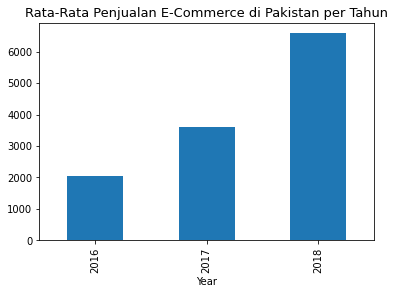

In [211]:
df_new.groupby('Year')['Grand_Total'].mean().plot.bar()
plt.title('Rata-Rata Penjualan E-Commerce di Pakistan per Tahun', size=13)


Melihat rata-rata per tahun yang meningkat, ini bisa menjadi pertanda bahwa industri e-commerce di Pakistan sedang berkembang, yang sejalan dengan [penelitian](https://www.kcci.com.pk/research/14745-2/) bahwa keuntungan industri ini mencapai sekitar 50 miliar Rupee Pakistan (PKR) pada tahun 2017 dan akan berada di kisaran 100 miliar PKR pada tahun 2018. 

#### B. Berdasarkan tren per bulan

Text(0.5, 1.0, 'Omset Penjualan per Bulan dari Juli 2016 hingga Agustus 2018')

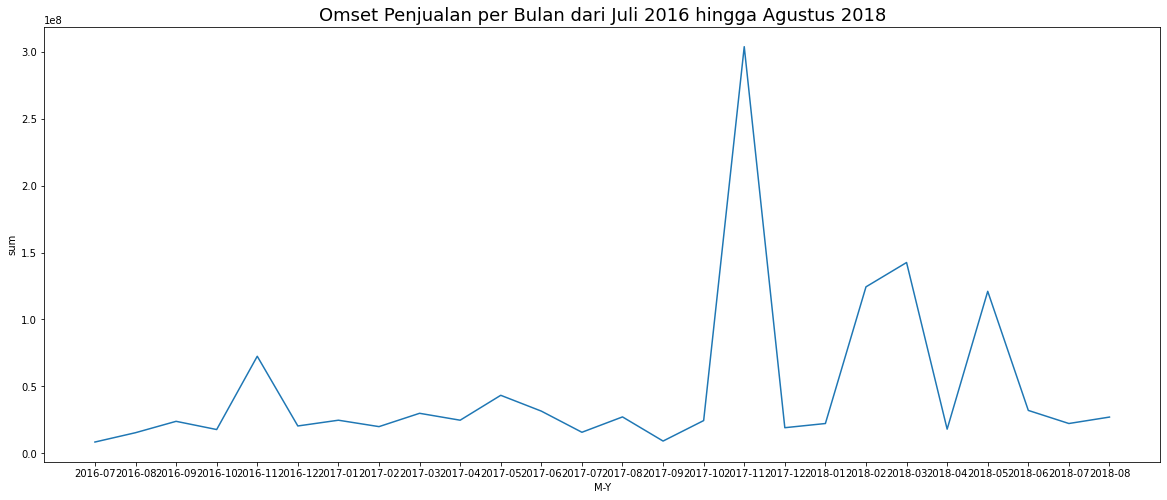

In [212]:
dfA1 = df_new.groupby('M-Y')['Grand_Total'].agg(['sum']).reset_index()
plt.figure(figsize=(20,8))
sns.lineplot(x=dfA1['M-Y'].astype(str), y=dfA1['sum'])
plt.title('Omset Penjualan per Bulan dari Juli 2016 hingga Agustus 2018', size=18)

Pada setiap tahun tahun 2016 dan 2017, bulan November selalu memiliki nilai transaksi tertinggi dan memiliki perbedaan yang signifikan dengan bulan lainnya dalam catatan omset penjualan. Ini merujuk kepada budaya 'Black Friday' dari Amerika yang juga [dirayakan di Pakistan](https://www.mpc.com.pk/blog/black-friday-to-be-celebrated-in-pakistan/), meskipun menuai banyak pro dan kontra terkait penamaan karena penduduk Pakistan mayoritas memeluk agama Muslim yang memiliki hari ibadah khusus yang dilakukan di hari Jumat.<br> 
Hal ini didukung oleh sebuah pengamatan yang menyatakan bahwa pada Black Friday, tingkat pembelian di e-commerce [meningkat](https://www.trade.gov/country-commercial-guides/pakistan-ecommerce).

Text(0.5, 0, 'Gambar 1.2')

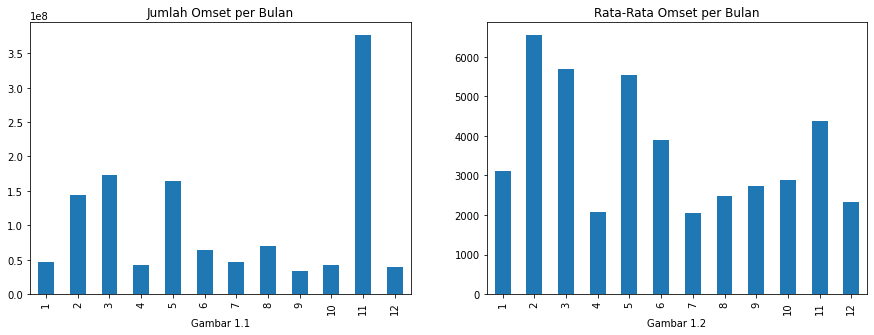

In [213]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Jumlah Omset per Bulan')
df_new.groupby('Month')['Grand_Total'].sum().plot.bar()
plt.xlabel('Gambar 1.1')
plt.subplot(1,2,2)
plt.title('Rata-Rata Omset per Bulan')
df_new.groupby('Month')['Grand_Total'].mean().plot.bar()
plt.xlabel('Gambar 1.2')

Data diatas menampilkan bahwa nominal Omset pada bulan November merupakan yang tertinggi (Gambar 1.1). Namun harga rata-rata per transaksi bulan November berada diluar Top 3 (Gambar 2.2). Untuk menjelaskan hal tersebut, mari kita analisa lebih lanjut.

Text(0.5, 1.0, 'Jumlah transaksi per Bulan')

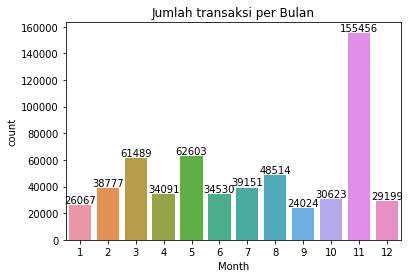

In [214]:
top_trx = df.groupby('Month')['item_id'].agg(['count']).reset_index()
splot = sns.barplot(x='Month', y='count', data=top_trx)
splot.bar_label(splot.containers[0])
plt.title('Jumlah transaksi per Bulan')

Barplot diatas mendukung pernyataan sebelumnya bahwa jumlah transaksi pada bulan November merupakan yang terbesar, dan sangat signifikan, sehingga mampu menyumbang omset tertinggi dari bulan-bulan lainnya.<br>
Namun yang menjadi pertanyaan adalah, mengapa dengan intensitas transaksi yang tinggi, tidak mampu membuat rata-rata omset tinggi? Akan dibahas pada plot dibawah.

Text(0.5, 0, 'Gambar 2.2')

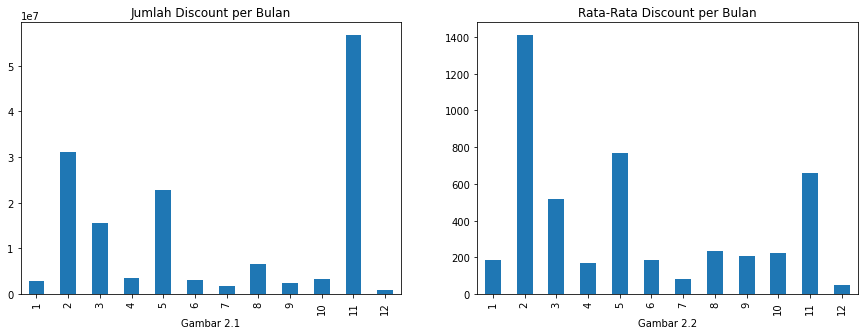

In [215]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Jumlah Discount per Bulan')
df_new.groupby('Month')['discount_amount'].sum().plot.bar()
plt.xlabel('Gambar 2.1')
plt.subplot(1,2,2)
plt.title('Rata-Rata Discount per Bulan')
df_new.groupby('Month')['discount_amount'].mean().plot.bar()
plt.xlabel('Gambar 2.2')

Text(0.5, 0, 'Gambar 2.3')

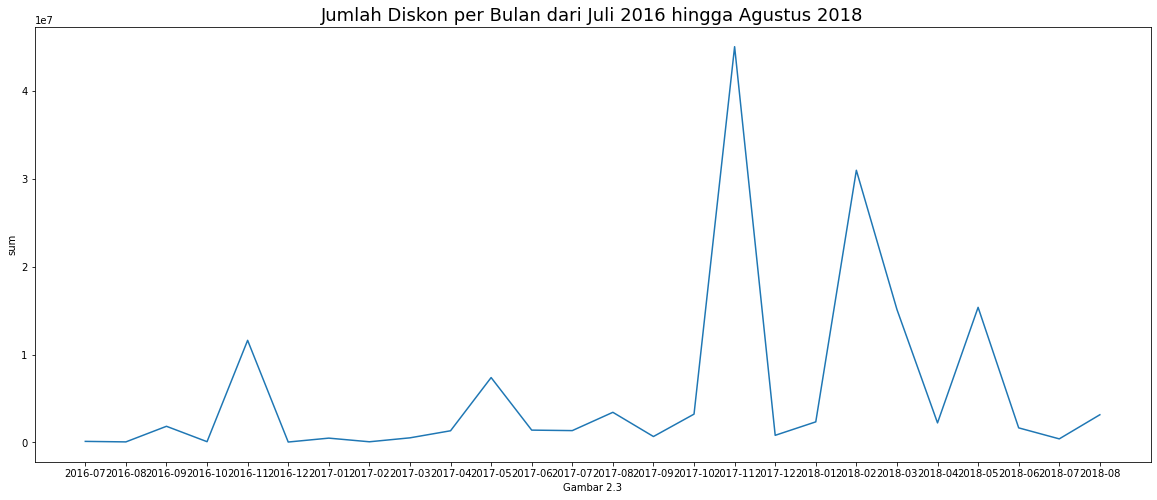

In [216]:
dfA2 = df_new.groupby('M-Y')['discount_amount'].agg(['sum']).reset_index()
plt.figure(figsize=(20,8))
sns.lineplot(x=dfA2['M-Y'].astype(str), y=dfA2['sum'])
plt.title('Jumlah Diskon per Bulan dari Juli 2016 hingga Agustus 2018', size=18)
plt.xlabel('Gambar 2.3')

Gambar 2.1 menampilkan bahwa jumlah nominal diskon pada bulan November lebih banyak dari bulan lainnya yang didukung oleh Gambar 2.3 yang mana menunjukkan bahwa pada setiap tahunnya, bulan November selalu memiliki catatan jumlah diskon terbesar. Meskipun, rata-rata diskon per transaksi untuk bulan November berada di peringkat 3 (Gambar 2.2). Hal ini menunjukkan bahwa rendahnya rata2 omset pada bulan November dikarenakan pelanggan banyak memanfaatkan diskon untuk melakukan pembelian. Harga yang lebih rendah namun jumlah pembelian tinggi mampu membuat bulan November menjadi bulan dengan Omset terbesar.

Dari keseluruhan data diatas, data menunjukkan bahwa Bulan November memiliki Omset tertinggi karena tingginya intensitas belanja pada bulan tersebut.

#### C. Berdasarkan Kategori

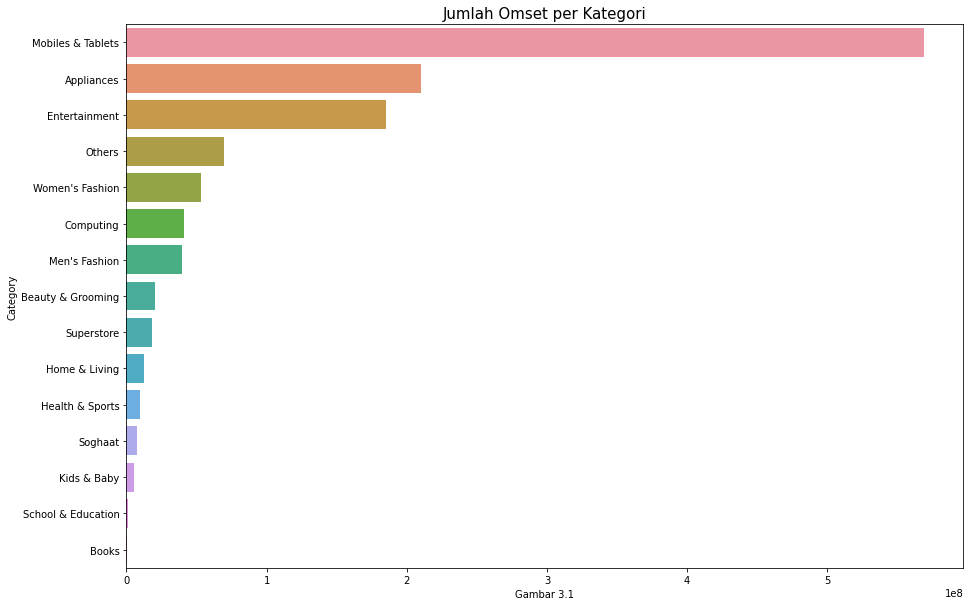

In [217]:
Desc_Cat1=df_new.groupby('Category')['Grand_Total'].agg(['sum']).reset_index().sort_values(by='sum',ascending=False)
plt.figure(figsize=(15,10))
graph=sns.barplot(y='Category',x='sum',data=Desc_Cat1)
plt.title('Jumlah Omset per Kategori', size=15)
plt.xlabel('Gambar 3.1')
plt.show()

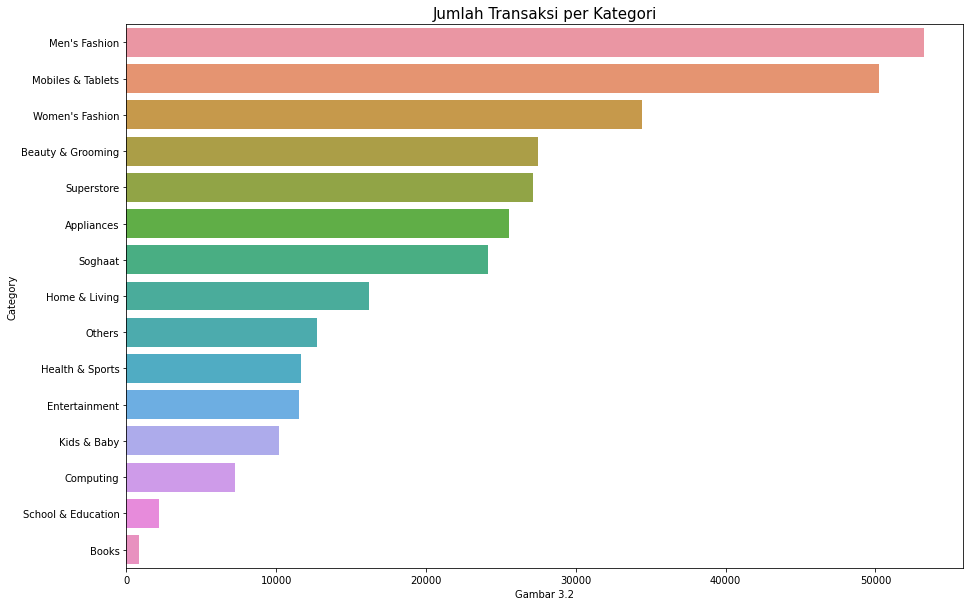

In [218]:
Desc_Cat2=df_new.groupby('Category')['item_id'].agg(['count']).reset_index().sort_values(by='count',ascending=False)
plt.figure(figsize=(15,10))
graph=sns.barplot(y='Category',x='count',data=Desc_Cat2)
plt.title('Jumlah Transaksi per Kategori', size=15)
plt.xlabel('Gambar 3.2')
plt.show()

Data diatas menampilkan bahwa omset penjualan terbesar didapatkan dari penjualan Gadget, lalu disusul oleh alat perkakas dan hiburan. Sedangkan pada jumlah item yang dibeli, Pakaian Pria menjadi yang terbanyak lalu diikuti oleh Gadget dan Pakaian Wanita.

Dari keseluruhan data diatas, menunjukkan bahwa dengan banyaknya jumlah item terjual tidak berkorelasi langsung dengan omset melainkan ada harga yang juga menjadi faktor untuk menciptakan omset.

### 2. Strategi Pemasaran (Discount)

Text(0.5, 0, 'Gambar 4.2')

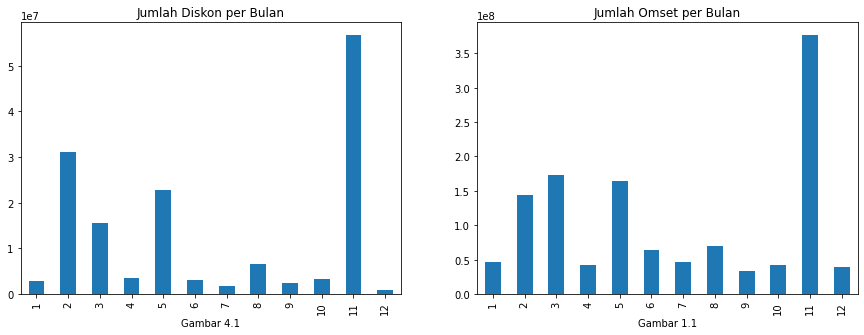

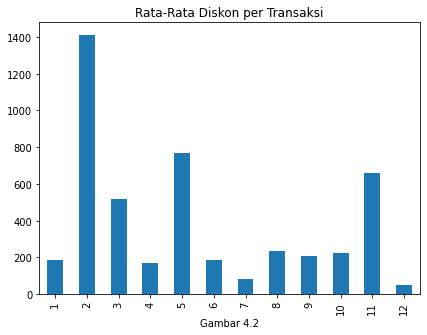

In [219]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Jumlah Diskon per Bulan')
df_new.groupby('Month')['discount_amount'].sum().plot.bar()
plt.xlabel('Gambar 4.1')
# Grafik dibawah ini sama dengan grafik di sub bab sebelumnya. Digunakan kembali dengan nama yang sama (Gambar 1.1) sehingga tidak memiliki nama ganda.
plt.subplot(1,2,2)
plt.title('Jumlah Omset per Bulan')
df_new.groupby('Month')['Grand_Total'].sum().plot.bar()
plt.xlabel('Gambar 1.1')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Rata-Rata Diskon per Transaksi')
df_new.groupby('Month')['discount_amount'].mean().plot.bar()
plt.xlabel('Gambar 4.2')


Data diatas menampilkan bahwa fluktuasi data dari Total Diskon dan Total Omset relatif sama, dengan Top 4 pada bulan Februari, Maret, Mei dan November. Itu juga menunjukkan bahwa distribusi penggunaan diskon tidak merata pada setiap bulannya. Pada Bulan Februari, Maret dan Mei ditunjang oleh rata-rata diskon per transaksi yang relatif tinggi sehingga menghasilkan omset yang sesuai.

### 3. Fitur dan Pelayanan (Pembayaran dan Status)

Data yang akan diuji merupakan data Non-Parametrik, maka akan dilakukan uji hipotesis untuk 2 kolom/grup berbeda dengan Nominal Data untuk mengetahui hubungan antara Metode Pembayaran dan Status Pembelian. Pengujian yang dinilai tepat adalah dengan menggunakan metode Chi Square Test.

In [220]:
df_ct= pd.crosstab(df['payment_method'],df['status'])
score, pval, dof,exp=chi2_contingency(df_ct)
if pval<=0.05:
    print('Metode Pembayaran dan Status Pembayaran memilik korelasi')
else:
    print('Metode Pembayaran dan Status Pembayaran tidak memilik korelasi')

Metode Pembayaran dan Status Pembayaran memilik korelasi


Text(0.5, 1.0, 'Proporsi Status Pembelian')

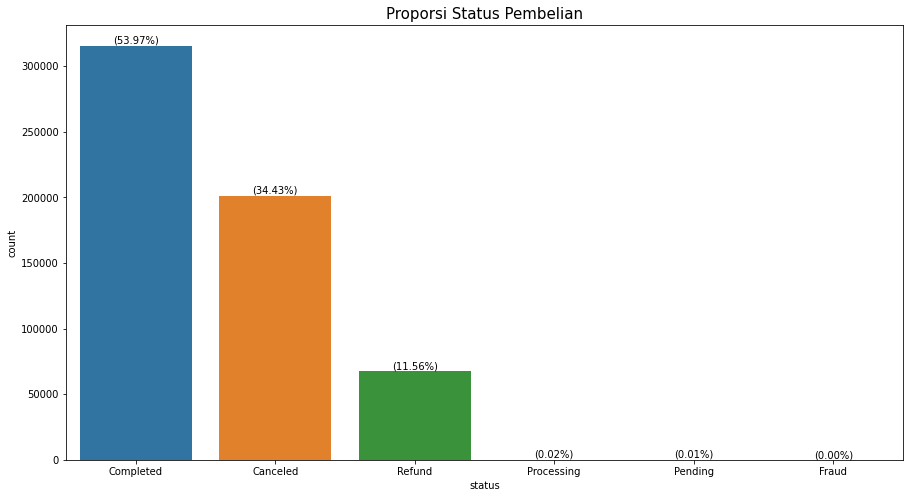

In [221]:
plt.figure(figsize=(15,8))
status = sns.countplot(x=df['status'],order=df['status'].value_counts(ascending=False).index)        
abs_values1 = df['status'].value_counts(ascending=False)
rel_values1 = df['status'].value_counts(ascending=False, normalize=True).values * 100
lbls1 = [f'({p[1]:.2f}%)' for p in zip(abs_values1, rel_values1)]
status.bar_label(container=status.containers[0], labels=lbls1)
plt.title('Proporsi Status Pembelian', size=15)

Text(0.5, 1.0, 'Proporsi Metode Pembayaran')

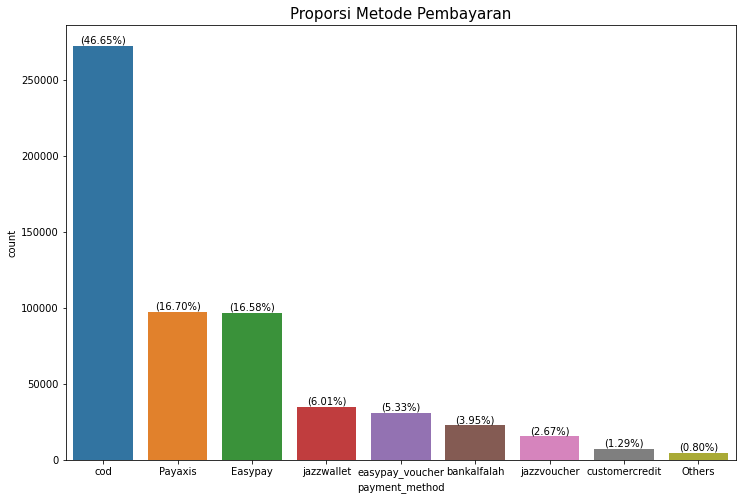

In [222]:
plt.figure(figsize=(12,8))
payment = sns.countplot(x=df['payment_method'],order=df['payment_method'].value_counts(ascending=False).index)
abs_values2 = df['payment_method'].value_counts(ascending=False)
rel_values2 = df['payment_method'].value_counts(ascending=False, normalize=True).values * 100
lbls2 = [f'({p[1]:.2f}%)' for p in zip(abs_values2, rel_values2)]
payment.bar_label(container=payment.containers[0], labels=lbls2)
plt.title('Proporsi Metode Pembayaran', size=15)

Dari barplot Proporsi Status Pembayaran, menampilkan data bahwa convertion rate (status = Completed) memiliki proporsi terbesar dengan 53.97%. Disusul oleh Canceled (34.43%) dan Refund (11.56%). Sedangkan pada Proporsi Metode Pembayaran, cod atau Cash on Delivery menjadi pilihan yang paling diminati oleh pembeli dengan proporsi 46.65% dan diikuti oleh Payaxis dan Easypay dengan masing-masing proporsi 16.70% dan 16.58%. Untuk hubungan kedua tabel tersebut, akan kita bahas di plot selanjutnya.

In [223]:
print(df.shape)
print(df_new.shape)

(584524, 19)
(314649, 19)


In [224]:
new_tab = df[['payment_method', 'status']]
stack = new_tab.groupby(['payment_method','status']).size().reset_index(name='count')
stack['Percentage'] = 100 * stack['count'] / stack.groupby('payment_method')['count'].transform('sum')
fig = px.bar(stack, x="payment_method", y="count", color="status", text=stack['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)), title="Status by Payment Method", height=600)
fig.show()

Data diatas menampilkan bahwa sistem pembayaran cod (Cash on Delivery) merupakan metode pembayaran yang paling sering digunakan oleh pembeli, dengan convertion rate (Status = Completed) sebesar 72%. Diikuti oleh Easypay dan Payaxis dengan convertion rate masing-masing 32.88% dan 32.76%, jauh dibawah metode pembayaran cod.

## Kesimpulan dan Rekomendasi

### Kesimpulan

Hasil analisa yang dilakukan, kita bisa membuat kesimpulan terkait kecenderungan (trend) hasil penjualan sebagai berikut:
- Ada perkembangan pada hasil penjualan dari tahun ke tahun
- Penjualan tertinggi ada di bulan November. Meskipun memiliki rata-rata diskon per transaksi yang rendah, namun angka transaksi di bulan November menjadi yang tertinggi dari bulan lainnya.
- Omset tertinggi diperoleh melalui hasil penjualan Gadget, meskipun produk Pakaian Pria yang menjadi best seller. Hasil tersebut bisa didapatkan karena produk Gadget memiliki nilai yang lebih mahal dibandingkan dengan produk Pakaian Pria sehingga barang yang terjual bisa lebih sedikit namun omset yang didapatkan tinggi.


Keberadaan diskon sebagai daya tarik pembeli turut dianalisa. Pengaruh jumlah diskon terhadap pembelian adalah sebagai berikut:
- Fluktuasi dari Total Diskon dan Total Omset relatif sama.
- Distribusi penggunaan diskon tidak merata setiap bulannya, di dominasi oleh 4 bulan yaitu Februari, Maret, Mei dan November.
- Bulan Februari, Maret dan Mei memiliki rata-rata diskon per transaksi yang cukup besar sehingga menunjang hasil penjualan. Namun pada bulan November, dengan rata-rata diskon yang relatif rendah dibandingkan omsetnya ditunjang dengan banyaknya transaksi yang terjadi sehingga menaikkan omset bulanan.

Metode Pembayaran dan Status Pembayaran juga ditinjau sebagai bentuk usaha dalam memuaskan pelanggan, sehingga merasa aman dan nyaman dalam berbelanja. Hasil dari analisa yang dilakukan adalah sebagai berikut:
- Menggunakan uji hipotesis dengan metode Chi Square Test, metode pembayaran dan status dinyatakan memiliki korelasi. 
- Status pembayaran menjadi hal yang cukup penting untuk menunjang omset. Convertion rate dari total keseluruhan berada di angka 53.97% dan produk dalam proses di angka 0,02%. Angka 60% relatif rendah, mengingat setiap transaksi gagal adalah omset yang hilang.
- Metode pembayaran yang paling banyak dipilih adalah cod atau Cash on Delivery (46.65%), lalu diikuti oleh Easypay (16.70%) dan Payaxis (16.58%) dengan masing-masing convertion rate (status = Completed) adalah 72.06%, 32.88% dan 32.76%.

### Rekomendasi

Hasil penjualan E-Commerce di Pakistan cenderung meningkat dari tahun ke tahun. Ini merupakan kesempatan yang baik untuk menjadi Top Mind Brand sehingga dapat memenangkan persaingan bisnis. Beberapa hal yang berpengaruh terhadap omset growth dan rekomendasi adalah sebagai berikut:
1. Black Friday/Hari Libur Nasional<br>
Black Friday merupakan perayaan nasional di Pakistan dimana para penjual memberikan potongan harga dalam waktu tertentu. Hal ini tentu bisa menjadi contoh untuk membuat hal serupa di hari libur nasional lainnya seperti Idul Fitri, Idul Adha maupun tahun baru. Dengan memberikan diskon, maka konsumen akan terangsang untuk melakukan pembelian dan mulai terbiasa menggunakan e-commerce. Terbukti pada bulan November, dengan diskon per transaksi yang relatif rendah, bisa memberikan hasil omset yang sangat tinggi dibandingkan bulan lainnya dengan memanfaatkan event khusus/hari libur nasional.
2. Diskon<br>
Distribusi diskon pada setiap bulannya belum merata. Aktifitas penjualan di beberapa bulan bahkan relatif sangat rendah dengan rata-rata diskon per transaksi yang juga rendah. Hal yang bisa dilakukan adalah menaikkan penawaran diskon kepada pelanggan disaat tidak sedang dalam hari libur nasional atau event khusus. Hal itu dilakukan untuk menciptakan Top Mind Brand di masyarakat, karena kita selalu memberikan penawaran yang baik. Dengan begitu, masyarakat bisa mulai terbiasa menggunakan dan diharapkan akan menjadi customer yang loyal. Pemberian diskon sendiri juga tidak sembarangan. Top Category bisa menjadi alternatif yang baik dalam menaikkan omset.<br>
Beberapa alternatif untuk memberikan diskon secara konstan untuk menaikkan aktifitas jual beli yaitu melakukan kerjasama dengan perusahaan jasa keuangan sebagai sarana pembayaran, ekspedisi sebagai sarana pengiriman maupun dengan pemilik toko. Dengan begitu, maka semua pihak akan diuntungkan.<br>
Selain itu ada saran untuk hal ini, yaitu mulai mengambil data terkait informasi untuk klasifikasi konsumen sehingga promosi bisa dilakukan dengan strategi yang tepat.
3. Fitur dan Pelayanan<br>
Hal ini merujuk pada fitur pembayaran sebagai alat bantu untuk mempermudah proses pembayaran dan status pembelian sebagai feedback/refleksi dari pelayanan pengantaran dan/atau customer service, dimana kedua kriteria ini memiliki korelasi satu sama lain. Untuk metode pembayaran yang digunakan itu cukup beragam, dimana itu bagus untuk memudahkan proses pembayaran dari customer. Namun yang menjadi masalah adalah convertion rate / tingkat kesuksesan untuk dikonversi menjadi omset yang 'hanya' sekitar 54%. Ini sangat rendah, bila merujuk pada potensi omset yang hampir 2x lipat bila kita mampu untuk mengkonversi semua transaksi menjadi omset. Ada 2 kategori terbesar yang menjadi penghambat yaitu Canceled (34,43%) dan Refund (11,56%). Ini harus ditelusuri penyebabnya dan segera dilakukan perbaikan pada setiap aspek penyebab. Apakah dari metode pembayaran yang kurang bersahabat dengan pembeli, customer service yang kurang bisa diandalkan, ekspedisi pengiriman yang mengirimkan produk dengan keadaan kurang baik, ataukah ada hal yang lain. Karena brand image akan sangat menentukan dimana posisi anda dalam persaingan, terutama di bisnis yang baru mulai berkembang seperti ini. Untuk faktor yang kurang besar seperti Pending (0,01%) dan Fraud (<0,01%) juga harus ditelusuri karena pelayanan menunjukkan identitas perusahaan yang sebenarnya. Dengan pelayanan yang cepat dan aman, maka customer akan merasa nyaman dan dapat menaikkan omset.